In [14]:
import testing as tst
from matplotlib import pyplot as plt
import fredpy as fp
import os
from talib import MA as ma
from dotenv import load_dotenv
load_dotenv()
fp.api_key = os.getenv("FREDPY_API_KEY")

In [7]:
hawkishness = tst.create_index("prompt_1", "gpt-3.5-turbo")

2023-10-12 17:39:54 [info     ] retreiving gpt-3.5-turbo_prompt_1_FOMCpresconf20110622.json
2023-10-12 17:39:54 [info     ] retreiving gpt-3.5-turbo_prompt_1_FOMCpresconf20170920.json
2023-10-12 17:39:54 [info     ] retreiving gpt-3.5-turbo_prompt_1_FOMCpresconf20140319.json
2023-10-12 17:39:54 [info     ] retreiving gpt-3.5-turbo_prompt_1_FOMCpresconf20130918.json
2023-10-12 17:39:54 [info     ] retreiving gpt-3.5-turbo_prompt_1_FOMCpresconf20210728.json
2023-10-12 17:39:54 [info     ] retreiving gpt-3.5-turbo_prompt_1_FOMCpresconf20230920.json
2023-10-12 17:39:54 [info     ] retreiving gpt-3.5-turbo_prompt_1_FOMCpresconf20200303.json
2023-10-12 17:39:54 [info     ] retreiving gpt-3.5-turbo_prompt_1_FOMCpresconf20210616.json
2023-10-12 17:39:54 [info     ] retreiving gpt-3.5-turbo_prompt_1_FOMCpresconf20120125.json
2023-10-12 17:39:54 [info     ] retreiving gpt-3.5-turbo_prompt_1_FOMCpresconf20200315.json
2023-10-12 17:39:54 [info     ] retreiving gpt-3.5-turbo_prompt_1_FOMCpresconf20

In [12]:
rate = fp.series("DGS5").data.reindex(hawkishness.index)

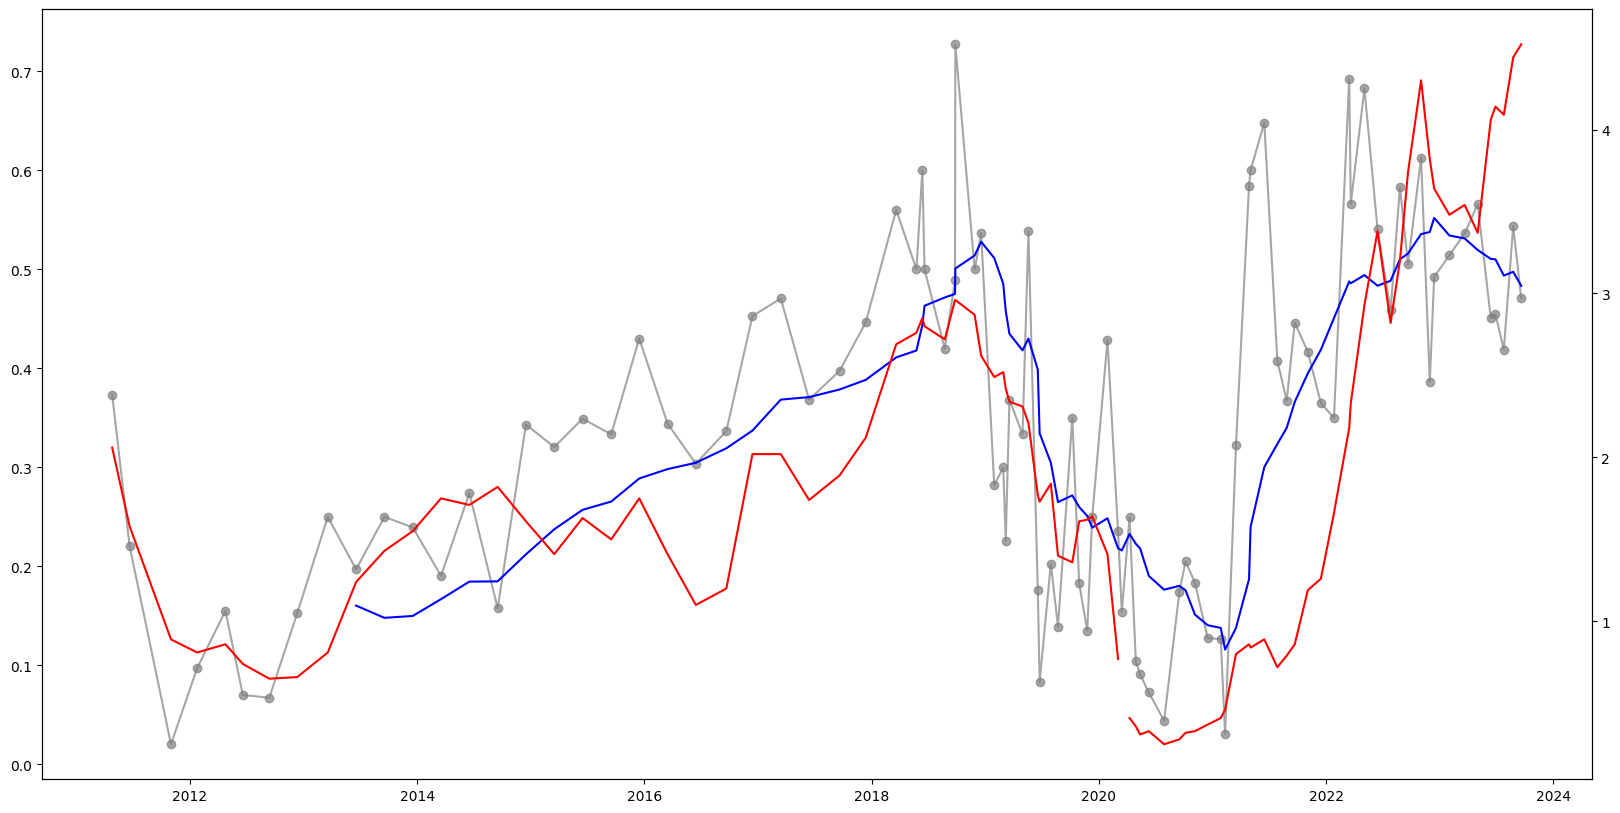

In [40]:
fig, ax = plt.subplots(figsize = (20,10))
ax.plot(hawkishness, "-o", alpha = 0.7, color = "grey")
ax.plot(ma(hawkishness, 10), color = "blue")
ax2 = ax.twinx()
ax2.plot(rate, color = "red")

In [34]:
rate.corr(ma(hawkishness, 10))

0.8428514834784253